## HR Analytics - Turnover analysis in Python

This notebook will introduce the different steps on how to perform some descriptive and predictive analysis on HR data with a particular focus on the turnover:
    
* First the dataset needs to be loaded using this IDE and prepared (data cleansing).
* Then we will perform basic EDA such as calculating basic statistics, creating some charts, etc.
* Finally we will run a simple logistic regression model to assess (predict) whether an employee leave or stay in the company.
    
Note: the dataset is public (from Kaggle) and available for everyone who wants to conduct some analysis.

### Step 1 - getting and preparing the data

This notebook will present the different steps to load a dataset, analyse it and predict the turnover by using a simple regression model, the Logistic Regression.

In [5]:
# Let's download the libraries for this first part

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset stored somewhere and visualise the first 5 rows

HRdataset = pd.read_csv(r"C:\Users\Matte\OneDrive\Bureau\HRDataset_v14.csv",sep=',', encoding='latin-1')

HRdataset.head()

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [7]:
# check the number of records in the dataset

print(HRdataset.shape[0])

311


In [8]:
# check if there are missing values 

HRdataset.isnull().any()

ï»¿Employee_Name              False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

We see from the above script that 2 columns contains NaN values: ManagerID and DateofTermination. We will deal with these later.

In [9]:
# Get a list of column names

column_names = list(HRdataset.columns.values)
print(column_names)

['ï»¿Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']


Looking at the above colunn headings, we can guess that the column Termd and DateofTermination are probably related to the presence of the employee in the company. 
As Termd is a binary variable, if an employee as 0, then he musn't have any termination date.
Let's perform a quick check across the 311 rows.

In [10]:
SubHRdataset=HRdataset.loc[0:311,['Termd','DateofTermination']]

for index, row in SubHRdataset.iterrows():
    if row['Termd']==0 and np.where(pd.notnull(row['DateofTermination'])):
        print(row['DateofTermination'], 'is ok')

nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok
nan is ok


From the script above, everything looks fine. It is possible that an employee left and for some reasons no date has been recorded (which would be considered as a missing value).
However, an employee still present in the company shouldn't have any termination date (which in this instance would be an incorrect value)

Let's now rename some columns for clarity.

In [11]:
# Rename any column names

HRdataset=HRdataset.rename(columns={'ï»¿Employee_Name':'Employee_name', 'Termd':'Headcount: In/Out'})
HRdataset.head()

,Employee_name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [12]:
# Quick check on the different data types in the dataset

HRdataset.dtypes

Employee_name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Headcount: In/Out               int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [13]:
# let's count the number of employees who left and those who are still in the HC:

HRdataset['Headcount: In/Out'].value_counts()

0    207
1    104
Name: Headcount: In/Out, dtype: int64

It seems 104 employees left and 207 are still in the headcount.

In [14]:
# we can run few statistics on numerical columns based on the status of the employee

HRdataset[['Salary', 'MarriedID','EmpSatisfaction','GenderID','Headcount: In/Out', 'Absences','SpecialProjectsCount']].groupby('Headcount: In/Out').mean()

,Salary,MarriedID,EmpSatisfaction,GenderID,Absences,SpecialProjectsCount
Headcount: In/Out,,,,,,
0,70694.033816,0.371981,3.893720,0.439614,9.830918,1.463768
1,65690.076923,0.451923,3.884615,0.423077,11.048077,0.730769


From the above, we can derive interesting insights, an employee who left has on average a lower salary, generally married, quite the same employee satisfaction and gender, but more absences and less special projects.

This quite makes some sense - the higher the absenteeism rate, the lower the salary level, the lower the involvment in special projects are indications that an employee could leave or left.

### Step 2 - Creating some visuals to identify trends/patterns

Text(0, 0.5, 'Nb of employees')

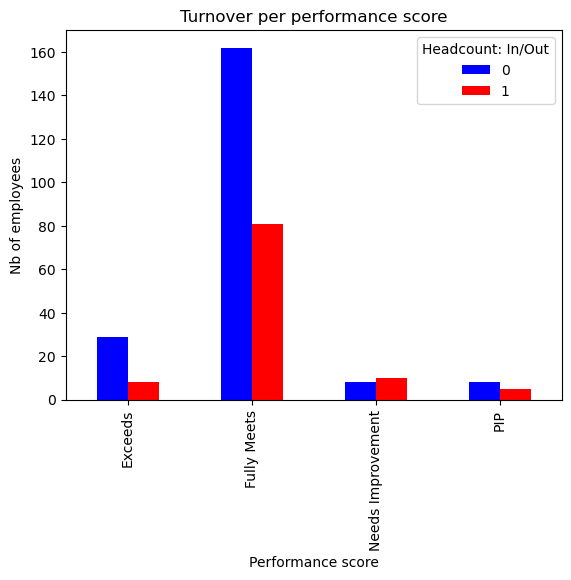

In [15]:
# Let's examine the performance score with the status of the employee in the company

# data=HRdataset[['PerformanceScore', 'Headcount: In/Out']]

%matplotlib inline

pd.crosstab(HRdataset.PerformanceScore,HRdataset['Headcount: In/Out']).plot(kind='bar',color=['blue','red'])
plt.title('Turnover per performance score')
plt.xlabel('Performance score')
plt.ylabel('Nb of employees')

From the chart above we can see that the better the performance score, the lesser the employee left the company.

Let's see if there is a correlation between the salary and engagement survey score depending on whether the employee left or is still in the company:


<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

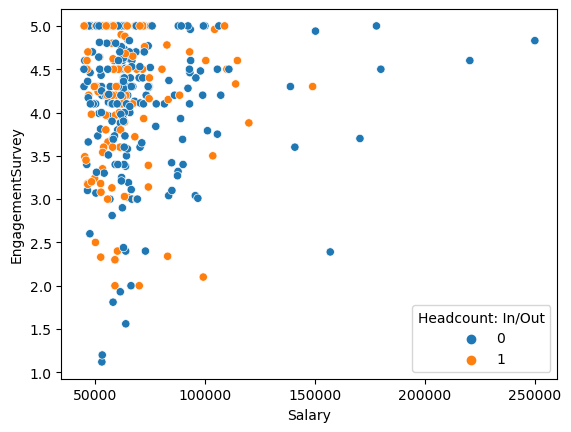

In [16]:
import seaborn as sns

sns.scatterplot(data=HRdataset, x='Salary', y='EngagementSurvey', hue=HRdataset['Headcount: In/Out'])

From the scatter plot above, we can see that for salary higher than 150k, no one left the company. For lower salaries, interestingly there is no clear correlation between the engagement survey score and the status (left or still present) of the employee in the company.

Let's quickly visualize the departments where employees mainly work and those who left the company.

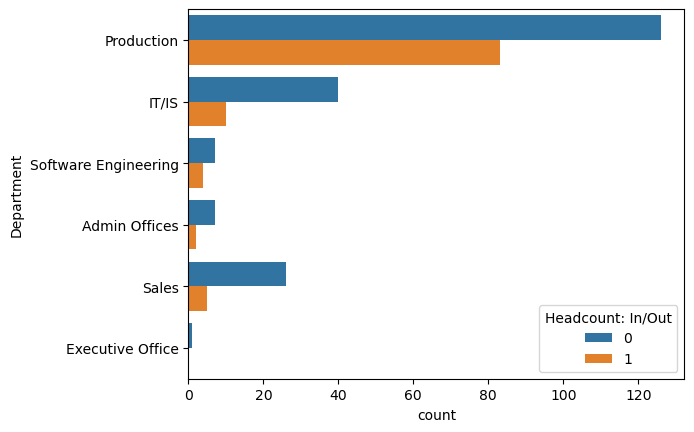

In [230]:
import matplotlib.pyplot as plt

sns.countplot(y =HRdataset['Department'].str.strip(), hue = "Headcount: In/Out", data = HRdataset)

plt.show()

We can run the same graph disclosing the employees per gender and status in the company. We can see that they are more females than males in the company and roughly 1/3 of each group left the company.
Intuitively and interestingly this finding would indicate that the gender is not a strong predictor for the turnover.

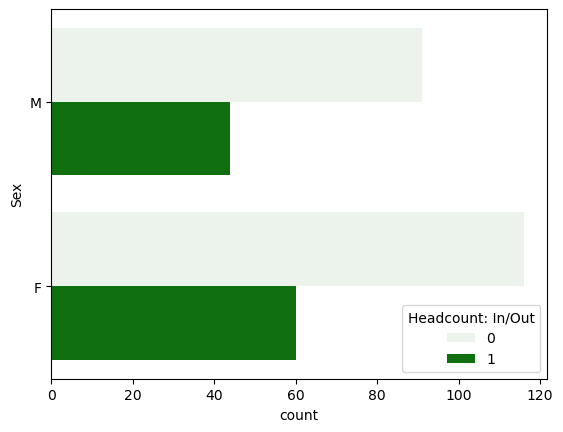

In [238]:
sns.countplot(y =HRdataset['Sex'].str.strip(), hue = "Headcount: In/Out", data = HRdataset, color='green')

plt.show()

### Step 3 - Applying and training a Logistic Regression model

First, we need to ensure that all the variables we will use in the model are numerical ones (if not we need to convert the columns - one way would be using the get_dummies() function in Pandas).

However, looking at the dataset, we can see all the variables we need are numerical ones. Let's list below these variables:

MaritalStatusID, 
GenderID, 
EmpStatusID, 
DeptID, 
PerfScoreID, 
FromDiversityJobFairID, 
Salary, 
Headcount: In/Out, 
PositionID, 
EngagementSurvey, 
EmpSatisfaction, 
SpecialProjectsCount, 
DaysLateLast30, 
AbsencesManagerID,
DOB,
DateofHire,
DateofTermination

However, the last 3 variables are non-numerical. Furthermore, We need to create 2 columns to calculate the age and the seniority in the company.


In [82]:
# first, we create a variable with today's date

Datetoday=pd.to_datetime('today').date()

# then, we convert the three columns in our dataframe in date format using Lambdas

DOB1= pd.to_datetime(HRdataset['DOB']).apply(lambda x: x.date())
DateofHire1 = pd.to_datetime(HRdataset['DateofHire']).apply(lambda x: x.date())
DateofTermination1 = pd.to_datetime(HRdataset['DateofTermination']).apply(lambda x: x.date())

# we need to calculate the seniority for those still employed in the company, using the variable below

v=((Datetoday - DateofHire1)/ np.timedelta64(1, 'Y')).round(0)

# we calculate the column Age as follows:

HRdataset['Age'] = ((Datetoday - DOB1)/ np.timedelta64(1, 'Y')).round(0)

# then we calculate the column seniority as follows, replacing NaN values by the variable v above

HRdataset['Seniority'] = ((DateofTermination1 - DateofHire1)/ np.timedelta64(1, 'Y')).round(0).fillna(v)

HRdataset.head()

,Employee_name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Seniority
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,41.0,13.0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,49.0,1.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,35.0,1.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,35.0,16.0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,34.0,5.0


We can see that the columns Age and Seniority are successfully added to our dataset. The next step would be creating a new dataframe with all the numerical variables discussed previously.

In [118]:
HRdataset1=HRdataset[['MaritalStatusID',
                     'GenderID', 
                     'EmpStatusID', 
                     'DeptID', 
                     'PerfScoreID', 
                     'FromDiversityJobFairID', 
                     'Salary', 
                     'PositionID', 
                     'EngagementSurvey', 
                     'EmpSatisfaction', 
                     'SpecialProjectsCount', 
                     'DaysLateLast30', 
                     'Absences',
                     'ManagerID', 
                     'Age',
                     'Seniority',
                     'Headcount: In/Out']].copy()

# for readability, the dependent variable ('Headcount: In/Out') is the last column, all other columns (16 in total) are called the predictors (independent variables)

HRdataset1.head()


,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,ManagerID,Age,Seniority,Headcount: In/Out
0,0,1,1,5,4,0,62506,19,4.60,5,0,0,1,22.0,41.0,13.0,0
1,1,1,5,3,3,0,104437,27,4.96,3,6,0,17,4.0,49.0,1.0,1
2,1,0,5,5,3,0,64955,20,3.02,3,0,0,3,20.0,35.0,1.0,1
3,1,0,1,5,3,0,64991,19,4.84,5,0,0,15,16.0,35.0,16.0,0
4,2,0,5,5,3,0,50825,19,5.00,4,0,0,2,39.0,34.0,5.0,1


In [120]:
# check if we have NaN values

HRdataset1.isna().sum()

MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Salary                    0
PositionID                0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
DaysLateLast30            0
Absences                  0
ManagerID                 8
Age                       0
Seniority                 0
Headcount: In/Out         0
dtype: int64

We see that 8 values are NaN for the column ManagerID (the same as those spotted in part 1 of this NB), let's remove these from the dataset.

In [121]:
HRdataset1 = HRdataset1.dropna()
HRdataset1.head()

,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,ManagerID,Age,Seniority,Headcount: In/Out
0,0,1,1,5,4,0,62506,19,4.60,5,0,0,1,22.0,41.0,13.0,0
1,1,1,5,3,3,0,104437,27,4.96,3,6,0,17,4.0,49.0,1.0,1
2,1,0,5,5,3,0,64955,20,3.02,3,0,0,3,20.0,35.0,1.0,1
3,1,0,1,5,3,0,64991,19,4.84,5,0,0,15,16.0,35.0,16.0,0
4,2,0,5,5,3,0,50825,19,5.00,4,0,0,2,39.0,34.0,5.0,1


In [197]:
# Now we are listing all columns names to define X and Y variables used in our model:

hr_X=HRdataset1.columns.values.tolist()

y=['Headcount: In/Out']
X=[i for i in hr_X if i not in y]

Using the Sickit library, let's import the logistic regression model along with the necessay features:

In [207]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')

# Among the 16 predictor variables, let's see what would be the best 11 ones
rfe = RFE(model,n_features_to_select=10,step=1)

rfe = rfe.fit(HRdataset1[X], HRdataset1[y].values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False  True False False  True  True  True  True
 False  True False  True]
[1 1 1 2 5 1 7 4 1 1 1 1 6 1 3 1]


We will use the 11 best variables selected above and run again the model as per the script below:

In [213]:
predictors=['MaritalStatusID',
            'GenderID', 
            'EmpStatusID', 
            'DeptID', 
            'Salary', 
            'EmpSatisfaction', 
            'SpecialProjectsCount', 
            'DaysLateLast30', 
            'Absences',
            'ManagerID', 
            'Seniority']
X=HRdataset1[predictors]
y=HRdataset1['Headcount: In/Out']

# let's split the data into training and test datasets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(
    C=1.0, 
    class_weight=None,       # we assume all classes have the same weight
    dual=False, 
    fit_intercept=True, 
    max_iter=1000,           # the number of iterations used for convergence
    multi_class='ovr',       # ovr is used for binary consideration
    n_jobs=1, 
    random_state=None,  
    tol=0.0001, 
    verbose=0,
    solver='liblinear',      # appropriate for small datasets
    warm_start=False)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', n_jobs=1,
                   solver='liblinear')

In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.96      0.98        27

    accuracy                           0.99        91
   macro avg       0.99      0.98      0.99        91
weighted avg       0.99      0.99      0.99        91



We can see from the classification report above that the accuracy score of the LR model is roughly 99%.

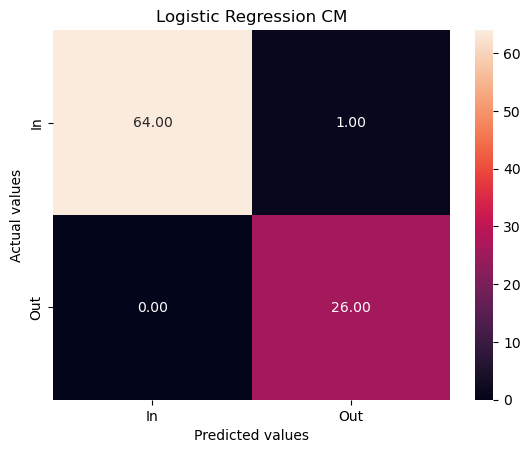

In [239]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_y_pred = logreg.predict(X_test)

logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)

sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["In", "Out"] , yticklabels = ["In", "Out"] )

plt.ylabel('Actual values')
plt.xlabel('Predicted values')

plt.title('Logistic Regression CM')

plt.savefig('Logistic_regression to Turnover')

From the confusion matrix above we can see the model only predicted incorrectly an employee who actually left and the model predicted it was still in the company.

### Additional step - visualising data in Power BI:

This part is intended to use the capabilities of Power BI to use Python language to integrate this kind of analysis. Note that they are limitations in using this language that need to be taken into account (security, architecture, report optimization, data refresh, etc.).

In order to keep this demo as simple as possible, we will export as an Excel file the "HRdataset1" and load it in Power BI.

The demonstration here will focus on visualising the confusion matrix above in Power BI.

In [242]:
file_name = 'HRdataset1.xlsx'
 
HRdataset1.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


Once the file is loaded in Power BI, in the Query Editor add a Python script as below:

Note - you need to import necessary libraries and run the entire script related to the Logistic Regression model including the confusion matrix.

In [ ]:
# 'dataset' holds the input data for this script

import pandas as pd
from sklearn.linear_model import LogisticRegression

predictors=['MaritalStatusID',
            'GenderID', 
            'EmpStatusID', 
            'DeptID', 
            'Salary', 
            'EmpSatisfaction', 
            'SpecialProjectsCount', 
            'DaysLateLast30', 
            'Absences',
            'ManagerID', 
            'Seniority']
X=dataset[predictors]
y=dataset['Headcount: In/Out']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(
    C=1.0, 
    class_weight=None, 
    dual=False, 
    fit_intercept=True, 
    intercept_scaling=1, 
    max_iter=1000, 
    multi_class='ovr', 
    n_jobs=1, 
    random_state=None,  
    tol=0.0001, 
    verbose=0,
    solver='liblinear', # appropriate for small datasets
    warm_start=False)

logreg.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)

ConfusionMatrix=pd.DataFrame(logreg_cm)
ConfusionMatrix.reset_index(inplace=True)
ConfusionMatrix

#### Image 1

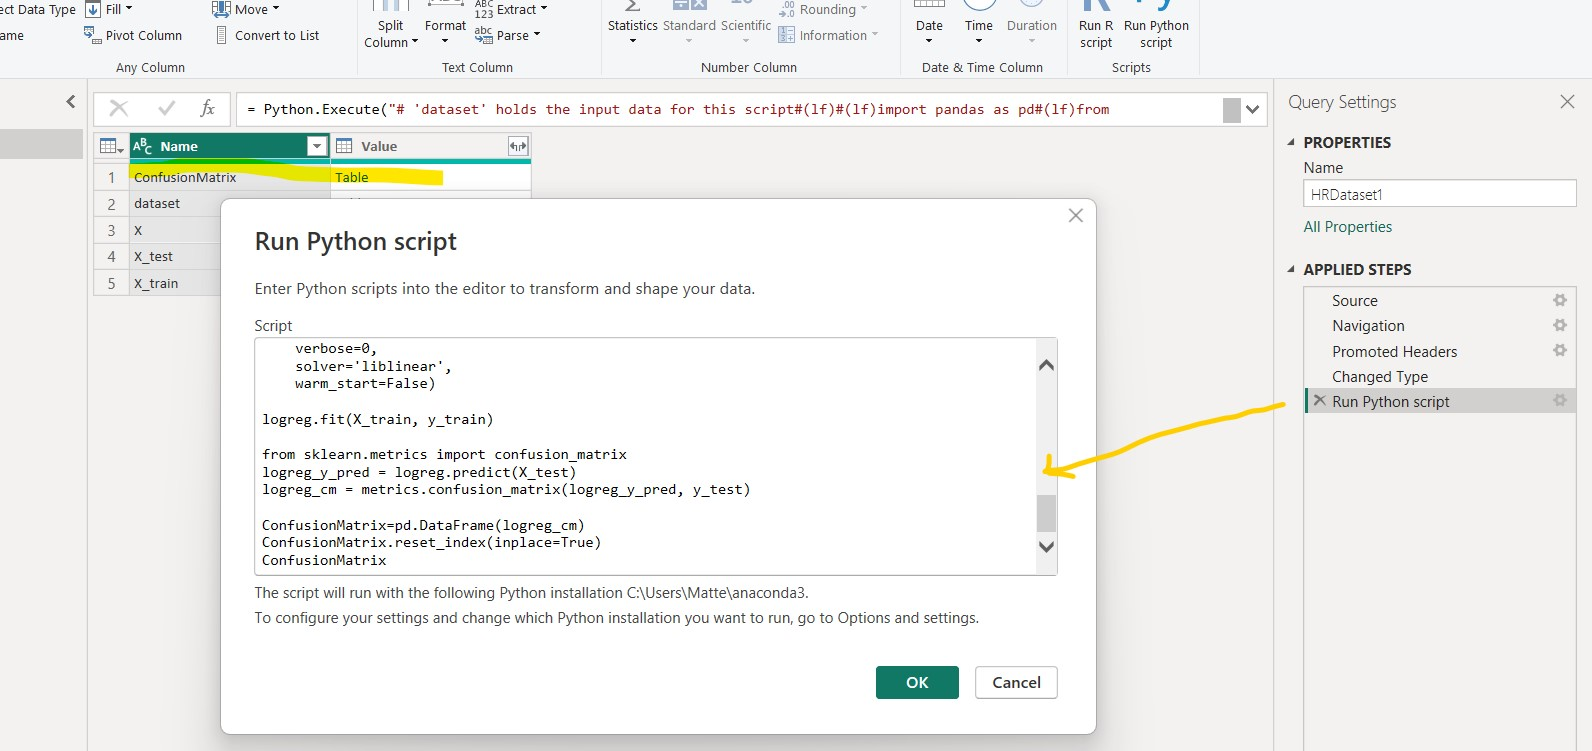

In [192]:
from IPython.display import Image

Image(filename='Screenshot1.jpg') 

#### Image 2

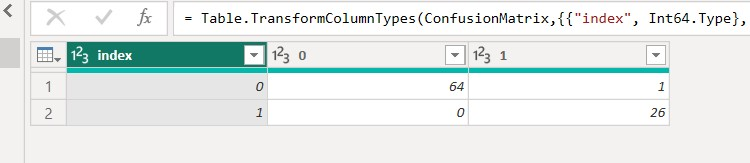

In [193]:
Image(filename='Screenshot2.jpg') 

The confusion matrix is now imported in Power BI as a dataframe. Next step is to create a visual using Python and seaborn library to replicate the visual. 
The code is as follows:

In [ ]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame()
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset, annot=True, fmt='.2f',xticklabels = ["In", "Out"] , yticklabels = ["Out", "In"] )

plt.title('Logistic Regression CM')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

#### Image 3

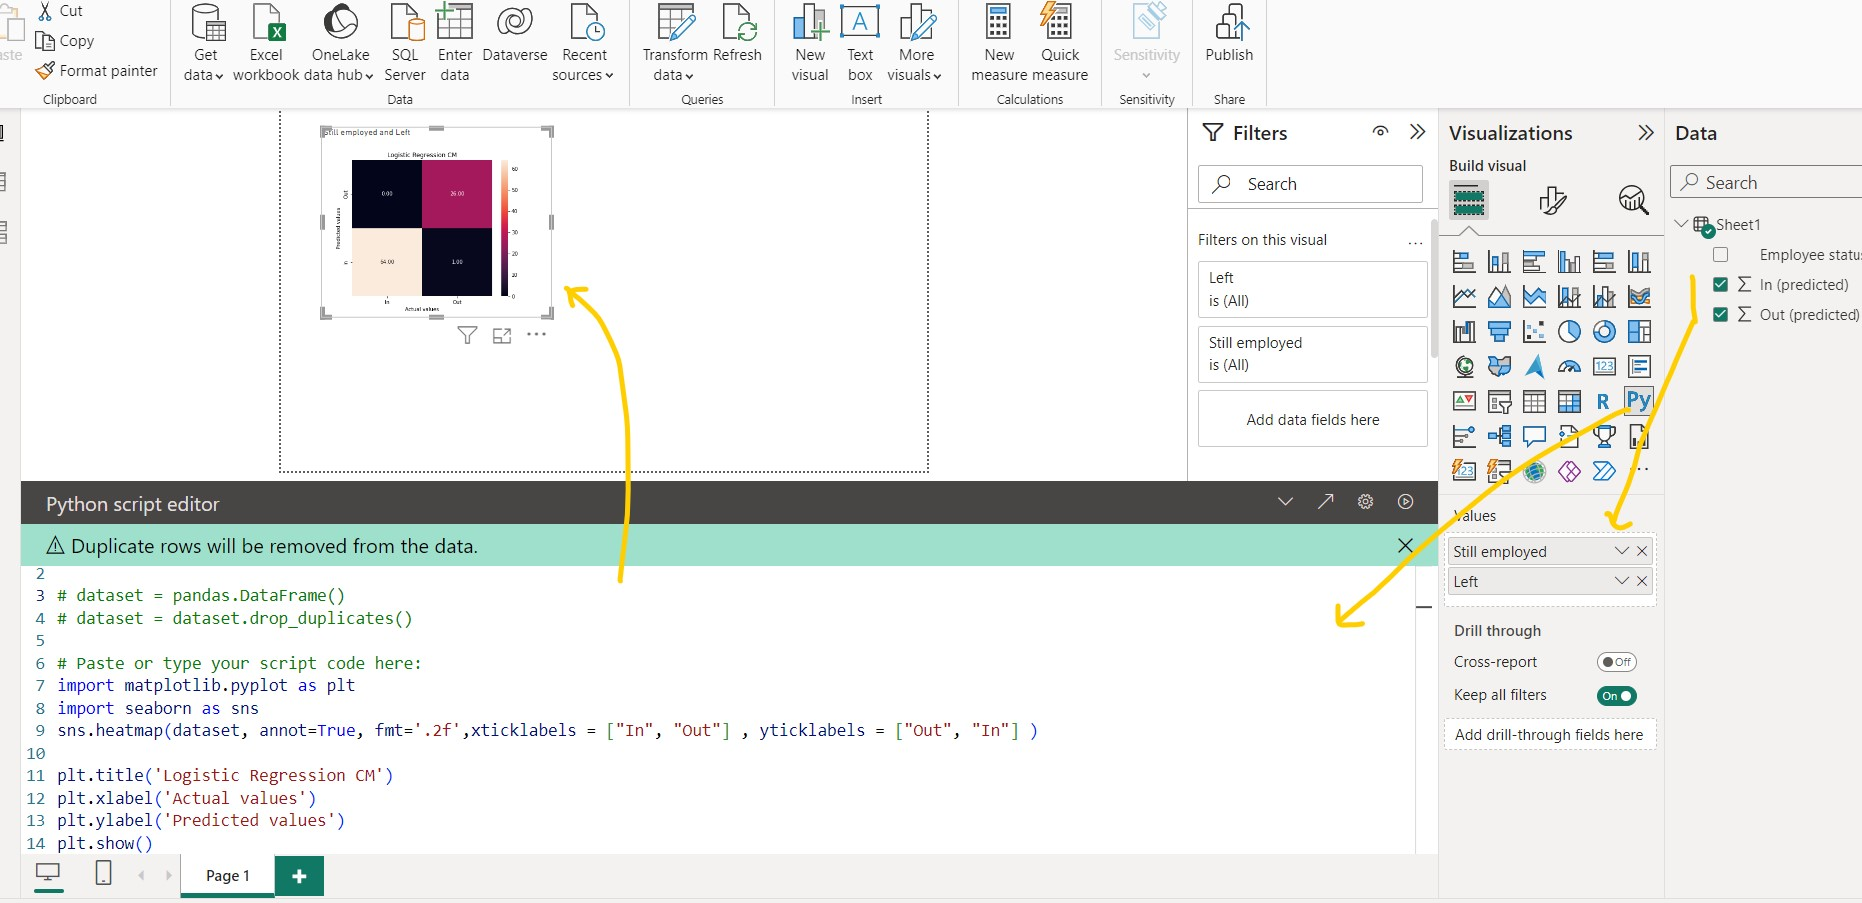

In [194]:
from IPython.display import Image

Image(filename='Screenshot3.jpg') 

We successfully run the model and visualized the confusion matrix entirely in Power BI. 

The same analysis can be done using other ML models such as Random Forest. This kind of analysis is obviously only informative and exploiting the full functionalities of tools and programming languages would share valuable information across stakeholders for a neater decision-making process.